# CDS-404 Numerik Cheatsheet

*Leandro Gregorini*

## Table of Contents <a class="anchor" id="TableofContents"></a>
Inhalte aus den Vorlesungen der Kurse: CDS-401, CDS-402 und CDS-404

#### Allgemeines
* [Table of Contents](#TableofContents)
* [Imports](#Imports)
* [Konstanten](#Konstanten)
* [Dezimalstellen von Werten](#DezimalstellenvonWerten)
    * [Wissenschaftliche Notation](#WissenschaftlicheNotation)
    
#### Analysis und Lineare Algebra
* [Mathematische Ausdrücke](#MathematischeAusdrücke)
    * [Standard-Ausdrücke](#Standard-Ausdrücke)
    * [Grad und Bogenmass umrechnen](#GradundBogenmassumrechnen)
    * [Pythagoras](#Pythagoras)
    * [Elementare Algebra](#ElementareAlgebra)
    * [Linearkombinationen (Vektoren)](#Linearkombinationen)
    * [Eigenwerte und Eigenvektoren](#EigenwerteundEigenvektoren)
    * [Vektorfelder](#Vektorfelder)
    * [Matrizen](#Matrizen)
    * [Differential](#Differential)
    * [Integral](#Integral)
    * [Komplexe Zahlen](#KomplexeZahlen)
* [Plot für Funktionen mit zwei Variablen](#PlotfürFunktionenmitzweiVariablen)
* [Parametrisierte Kurven und Flächen](#ParametrisierteKurvenFlächen)

#### Numerik
* [Standard-Plots](#Standard-Plots)
    * [Basic Plot einer Funktion](#BasicPloteinerFunktion)
    * [Plot einer trigonometrischer Funktion (modifizierte x Achse)](#PloteinertrigonometrischenFunktion)
* [Heron-Verfahren](#Heron-Verfahren)
    * [Heron-Verfahren: Visualisierung](#Heron-VerfahrenVisualisierung)
    * [Heron-Verfahren: Numerisch](#Heron-VerfahrenNumerisch)
* [Rekursive Folgen](#RekursiveFolgen)
* [Interpolation](#Interpolation)
    * [Interpolation gemäss Newton-Schema](#InterpolationgemässNewton-Schema)
    * [Interpolation anhand von Library](#InterpolationanhandvonLibrary)
* [Regression](#Regression)
    * [Regression für Gerade](#RegressionfürGerade)
    * [Exponentielle Regression](#ExponentielleRegression)
* [Extrapolation](#Extrapolation)
    * [Extrapolation gemäss Neville-Aitken-Schema](#ExtrapolationgemässNeville-Aitken-Schema)
* [Numerische Integration](#NumerischeIntegration)
    * [Trapez-Regel](#Trapez-Regel)
    * [Trapez-Regel und Extrapolation](#Trapez-RegelundExtrapolation)
    * [Simpson-Regel](#Simpson-Regel)
* [Lineare Gleichungssysteme](#LineareGleichungssysteme)
    * [Gauss-Verfahren](#Gauss-Verfahren)
    * [Gauss-Jordan-Verfahren](#Gauss-Jordan-Verfahren)
    * [LR-Zerlegungen von Matrizen](#LR-ZerlegungenvonMatrizen)
    * [QR-Zerlegungen von Matrizen](#QR-ZerlegungenvonMatrizen)
    * [Hilbert-LGLS](#Hilbert-LGLS)
    * [LGLS iterativ lösen](#LGLSiterativlösen)

## Imports <a class="anchor" id="Imports"></a>

In [1]:
# Python initialisieren:
import numpy as np;

import sympy as sp;
x,y,z = sp.symbols('x y z'); # Symbole für sympy initialisieren
# from sympy import init_printing;
# pretty printing;
# init_printing();
import IPython.display as dp;
sp.init_printing();

import scipy as cp;
import scipy.interpolate as ip;
import scipy.integrate as ig;
import scipy.linalg;

import matplotlib.pyplot as pl;
%matplotlib inline
#%matplotlib notebook
#pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib as mpl;
from matplotlib import rcParams;
from mpl_toolkits import mplot3d;
mpl.rc('axes', labelsize=12);
mpl.rc('xtick', labelsize=10);
mpl.rc('ytick', labelsize=10);
mpl.rcParams["font.size"]=10;
mpl.rcParams["font.family"]= "sans-serif";
mpl.rcParams["text.usetex"] = False;

fig = 0; # Standard-Bezeichnung für figures

## Konstanten <a class="anchor" id="Konstanten"></a>

In [34]:
# Mathematische Konstanten:
pi=3.141592653589793;
eu=2.718281828459045;

## Dezimalstellen von Werten <a class="anchor" id="DezimalstellenvonWerten"></a>

In [5]:
# Berechnungen:
x = 1/3 # Rechnung bzw. Ausdruck
# Ausgabe:
print(f"x= {x:#.{16}g}"); # 16 = Anzahl nachkommastellen -> pr (precision)

x= 0.3333333333333333


### Wissenschaftliche Notation <a class="anchor" id="WissenschaftlicheNotation"></a>

In [6]:
# Mit e Notation
x = 1/3
scientific_notation= "{:e}".format(x*10**12)
print("x*10**12 =", scientific_notation)

# Ohne e Notation
normal_notation = format(x*10**12, '.16f')
print("x*10**12 =", normal_notation)

x*10**12 = 3.333333e+11
x*10**12 = 333333333333.3333129882812500


---

## Mathematische Ausdrücke <a class="anchor" id="MathematischeAusdrücke"></a> [Back to top](#TableofContents)

### Standard-Ausdrücke <a class="anchor" id="Standard-Ausdrücke"></a>

In [159]:
x = 3
print("x^3 =", x**3)
print("x^1/2 =", np.sqrt(3))
print("x^1/3 =", 3**(1/3))
print("x * 10^12 =", 3e12)
print("x * π =", x*np.pi)
print("\nsin(5π/4) =", np.sin(5*np.pi/4))
print("cos(5π/4) =", np.cos(5*np.pi/4))
print("tan(77°)=", np.tan(77*np.pi/180))
print("cot(−3π/5) =", 1/np.tan(-3*np.pi/5))
print("arccos(−0.45) =", np.arccos(-0.45))
print("arctan(34.1) =", np.arctan(1/34.1))
print("\ne =", np.exp(1))
print("e^(−3.34) =", np.exp(-3.34))
print("\nln(13.2) =", np.log(13.2))
print("log10(23) =", np.log(23)/np.log(10))
print("log10(23) =", np.log10(23))
print("log2(4) =", np.log(4)/np.log(2))
print("log2(4) =", np.log2(4))

x^3 = 27
x^1/2 = 1.7320508075688772
x^1/3 = 1.4422495703074083
x * 10^12 = 3000000000000.0
x * π = 9.42477796076938

sin(5π/4) = -0.7071067811865475
cos(5π/4) = -0.7071067811865477
tan(77°)= 4.331475874284157
cot(−3π/5) = 0.3249196962329063
arccos(−0.45) = 2.037561665842193
arctan(34.1) = 0.029317111023935784

e = 2.718281828459045
e^(−3.34) = 0.03543695772159864

ln(13.2) = 2.580216829592325
log10(23) = 1.3617278360175928
log10(23) = 1.3617278360175928
log2(4) = 2.0
log2(4) = 2.0


### Grad und Bogenmass umrechnen <a class="anchor" id="GradundBogenmassumrechnen"></a>

In [162]:
print(np.radians(45)) # Grad ins Bogenmass
print(np.degrees(np.pi/2)) # Bogenmass ins Gradmass

0.7853981633974483
90.0


### Pythagoras <a class="anchor" id="Pythagoras"></a>

In [237]:
# Parameter:
ME='m';  # Masseinheit
pr=3;    # Precision: Genauigkeit
a=3.;
b=4.;

# Berechnungen:
c=np.sqrt(a**2+b**2);

# Ausgabe:
print(f"Seite a = {a:#.{pr}g} {ME}");
print(f"Seite b = {b:#.{pr}g} {ME}");
print(f"Seite c = {c:#.{pr}g} {ME} (Pythagoras)");

Seite a = 3.00 m
Seite b = 4.00 m
Seite c = 5.00 m (Pythagoras)


### Elementare Algebra <a class="anchor" id="ElementareAlgebra"></a> [Back to top](#TableofContents)

> Für eine "schöne Ausgabe" in der Konsole kann folgender Befehl verwendet werden dp.display(...);

#### Ausmultiplizieren / Faktorisieren / Vereinfachen

In [83]:
ausdruck = x*x**2*(x**2-4)*(x**2-2*x-15)
# Berechnungen :
a = sp.expand(ausdruck);
b = sp.factor(ausdruck);
c = sp.simplify(ausdruck);
# Ausgabe :
print('Ausdruck =', ausdruck)
print('a =', a, '\t(expand -> Vollständiges Ausmultiplizieren)');
print('b =', b, '\t(factor -> Vollständiges Faktorisieren)');
print('c =', c, '\t(simplify -> Einfaches Vereinfachen)');

Ausdruck = x**3*(x**2 - 4)*(x**2 - 2*x - 15)
a = x**7 - 2*x**6 - 19*x**5 + 8*x**4 + 60*x**3 	(expand -> Vollständiges Ausmultiplizieren)
b = x**3*(x - 5)*(x - 2)*(x + 2)*(x + 3) 	(factor -> Vollständiges Faktorisieren)
c = -x**3*(x**2 - 4)*(-x**2 + 2*x + 15) 	(simplify -> Einfaches Vereinfachen)


#### Gleichungen lösen

In [223]:
# Um Gleichungen zu lösen, muss soweit umgestellt werden, dass eine Seite der Gleichung 0 ist
print('3*x+5-17 = 0')
L = sp.solve(3*x+5-17, x); # L = Lösungsmenge
print('L =', L);

# Ohne Gleichung nach 0 umzustellen
print('\nx**2+1 = 3*x-1');
L = sp.solve(sp.Eq(x**2+1, 3*x-1));
print('L =', L);

3*x+5-17 = 0
L = [4]

x**2+1 = 3*x-1
L = [1, 2]


#### Ungleichungen lösen

In [228]:
print('x**2 - 8*x + 15 <= 2');
L = sp.solve(sp.Le(x**2 - 8*x + 15, 2));
print('L =', L);

x**2 - 8*x + 15 <= 2
L = (x <= sqrt(3) + 4) & (4 - sqrt(3) <= x)


#### Lineare Gleichungssysteme lösen

| a           | b |
|-------------|---|
| x + 2*y     | 1 |
| 3*x + 5*y   | 2 |

In [229]:
# numpy
a = np.array([[1, 2], [3, 5]]);
b = np.array([1, 2]);
L = np.linalg.solve(a,b); # Berechnet die Lösung des Gleichungssystems
print('L =', L);
print('Konditionszahl =',np.linalg.cond(a)); # Berechnet die Konditionszahl (Verstärkungsfaktor zwischen Fehlern)
print('Lösung korrekt?', np.allclose(np.dot(a, L), b)); # Prüfen ob Lösung korrekt ist

L = [-1.  1.]
Konditionszahl = 38.974342094150515
Lösung korrekt? True


#### Stufenform berechnen

In [236]:
M = sp.Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]]);
Stufenform = M.rref();
dp.display(M, Stufenform[0])

Matrix([
[ 1,  0,  1,  3],
[ 2,  3,  4,  7],
[-1, -3, -3, -4]])

Matrix([
[1, 0,   1,   3],
[0, 1, 2/3, 1/3],
[0, 0,   0,   0]])

#### Grenzwert einer Folge

In [187]:
n = sp.symbols('n')
sp.limit_seq((n+2)/(n+2),n)

1

#### Berechnung einer Summe

In [188]:
# sp.summation(Argument,(Laufvariable,Anfangswert,Endwert)
sp.summation(n**2,(n,1,5))

55

### Linearkombinationen (Vektoren) <a class="anchor" id="Linearkombinationen"></a> [Back to top](#TableofContents)

#### Berechnungen mit Vektoren

In [199]:
# Numpy
# Parameter :
u = np.array([2 , -1]);
v = np.array([ -3 ,3]);
w = np.array([1 ,1/2]);

print('u =', u)
print('v =', v)
print('w =', w, '\n')

r = u + v;
print('r = u + v =', r);

r = 4*w;
print('r = 4*w =', r);

r = 2*(v+3*w);
print('r = 2*(v+3*w) =', r);

# Sympy
# Parameter :
u = sp.Matrix([[2], [-1]]);
v = sp.Matrix([[-3], [3]]);
w = sp.Matrix([[1], [1/2]]);

u_betrag = u.norm(); v_betrag = v.norm(); w_betrag = w.norm();
print('\nBetrag von u =', u_betrag, '| Betrag von v =', v_betrag, '| Betrag von w =', w_betrag);

r = u + v;
dp.display(r);

r = 4*w;
dp.display(r);

r = 2*(v+3*w);
dp.display(r);

u = [ 2 -1]
v = [-3  3]
w = [1.  0.5] 

r = u + v = [-1  2]
r = 4*w = [4. 2.]
r = 2*(v+3*w) = [0. 9.]

Betrag von u = sqrt(5) | Betrag von v = 3*sqrt(2) | Betrag von w = 1.11803398874989


Matrix([
[-1],
[ 2]])

Matrix([
[  4],
[2.0]])

Matrix([
[  0],
[9.0]])

#### Gram-Riemann-Skalar-Produkte

In [190]:
# Numpy
# Parameter :
v = np.array([1 ,2]);
w = np.array([3 ,4]);
# Berechnungen :
p = np.dot(v,w);
# Ausgabe :
print('p = ',"%0.3f"%(p));

# Sympy
# Parameter :
v = sp.Matrix([[1],[2]]);
w = sp.Matrix([[3],[4]]);
# Berechnungen :
p = sp.simplify(v.dot(w));
p = v.dot(w)
# Ausgabe :
dp.display(p);

p =  11.000


11

####  Grassmann-Vektor-Produkt

In [139]:
# Numpy
# Parameter :
v = np.array([1 ,2 ,3]);
w = np.array([4 ,5 ,6]);
# Berechnungen :
u = np.cross(v,w);
# Ausgabe :
print('v =', v)
print('w =', w)
print('u = v x w =', u)

# Sympy
# Parameter :
v = sp.Matrix([[1],[2],[3]]);
w = sp.Matrix([[4],[5],[6]]);
# Berechnungen :
u = v.cross(w);
# Ausgabe :
dp.display(u);

v = [1 2 3]
w = [4 5 6]
u = v x w = [-3  6 -3]


Matrix([
[-3],
[ 6],
[-3]])

#### Seiten und Winkel in Dreiecken

In [121]:
# Parameter :
A = np.array([2 ,0]); B = np.array([1 ,2]); C = np.array([-1, -1]); # Eckpunkte als Ortsvektoren
# Funktionen :
def Laenge(v): l =np.sqrt(np.dot(v,v)); return l;
def Winkel(v,w):
    phi= np.arccos(np.dot(v,w)/(Laenge(v)*Laenge(w))); return phi;
# Seitenvektoren :
a = C - B; b = A - C; c = B - A;
# Seitenlaengen :
l_a = Laenge(a); l_b = Laenge(b); l_c = Laenge(c);
# Innenwinkel :
w_a = Winkel(-b,c); w_b = Winkel(-c,a); w_c = Winkel(-a,b);
# Ausgabe :
print ('--------------------------------------------------');
print('A =', A, '| B =', B, '| C =', C)
print ('--------------------------------------------------');
print ('Seiten :');
print ('a ='," %0.2f"%(l_a));
print ('b ='," %0.2f"%(l_b));
print ('c ='," %0.2f"%(l_c));
print ('\nInnenwinkel :');
print ('alpha = '," %0.3f"%( w_a / np.pi ),'pi');
print ('beta = '," %0.3f"%( w_b / np.pi ),'pi');
print ('gamma = '," %0.3f"%( w_c / np.pi ),'pi');
print ('-------------------------------------------------- ');

--------------------------------------------------
A = [2 0] | B = [1 2] | C = [-1 -1]
--------------------------------------------------
Seiten :
a =  3.61
b =  3.16
c =  2.24

Innenwinkel :
alpha =   0.455 pi
beta =   0.335 pi
gamma =   0.210 pi
-------------------------------------------------- 


#### Orthogonal-Projektion

> Bei der orthogonalen Projektion handelt es sich um eine sogenannte Abbildung.

> Orthogonalprojektion: Vektor v wird auf Vektor w projiziert und in v(senkrecht) und
v(parallel) zerlegt

In [163]:
# Parameter :
v = np.array([2,3]); w = np.array([6,0]);
# Funktionen :
def OrtProj(v,w): u=np.dot(v,w) / np.dot(w,w)*w; return u;
# Berechnungen :
v_p= OrtProj(v,w);
v_s =v - v_p;
# Ausgabe :
print ('v = ', v);
print ('w = ', w);
print ('v_s = ', v_s);
print ('v_p = ', v_p);

v =  [2 3]
w =  [6 0]
v_s =  [0. 3.]
v_p =  [2. 0.]


### Eigenwerte und Eigenvektoren <a class="anchor" id="EigenwerteundEigenvektoren"></a> [Back to top](#TableofContents)

#### Mit Numpy

In [31]:
# Parameter :
A = np.array([[2,0],[0,3]]);
# Berechnungen :
[S,E] = np.linalg.eig(A);
# Ausgabe :
print(f"S = {S}");
print(f"E = \n{E}"); # normierte Eigenvektoren

S = [2. 3.]
E = 
[[1. 0.]
 [0. 1.]]


In [32]:
# Parameter :
A = np.array([[1,0,0],[2,2,-1],[0,-3,0]]);
# Berechnungen :
[S,E] = np.linalg.eig(A);
# Ausgabe :
print(f"S = {S}");
print(f"E = \n{E}"); # normierte Eigenvektoren

S = [-1.  3.  1.]
E = 
[[ 0.          0.          0.53452248]
 [-0.31622777 -0.70710678 -0.26726124]
 [-0.9486833   0.70710678  0.80178373]]


#### Mit Sympy

In [37]:
# Parameter :
A = sp.Matrix([[2,0],[0,3]]);
# Berechnungen :
[E,D] =A.diagonalize();
# Ausgabe :
dp.display(D);
dp.display(E);

⎡2  0⎤
⎢    ⎥
⎣0  3⎦

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [38]:
# Parameter :
A = sp.Matrix([[1,0,0],[2,2,-1],[0,-3,0]]);
# Berechnungen :
[E,D] =A.diagonalize();
# Ausgabe :
dp.display(D);
dp.display(E);

⎡-1  0  0⎤
⎢        ⎥
⎢0   1  0⎥
⎢        ⎥
⎣0   0  3⎦

⎡0  2   0 ⎤
⎢         ⎥
⎢1  -1  -1⎥
⎢         ⎥
⎣3  3   1 ⎦

### Vektorfelder <a class="anchor" id="Vektorfelder"></a> [Back to top](#TableofContents)

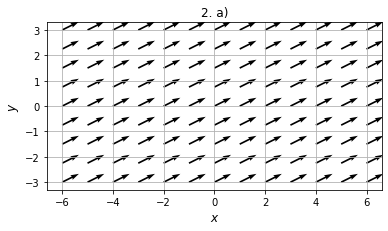

In [254]:
# Parameter :
x_0 = -6; x_E = 6; y_0 = -3; y_E = 3;
N_x = 13; N_y = 9; sc = 10; lw = 0.005; fig = fig+1;
# Funktionen :
def a(x,y):
    v_x =0.5; # x-Daten des Vektorfeldes
    v_y =0.25; # y-Daten des Vektorfeldes
    return v_x, v_y;
# Daten :
x_data = np.linspace(x_0 ,x_E, N_x);
y_data = np.linspace(y_0 ,y_E, N_y);
[x_grid , y_grid ]= np.meshgrid(x_data, y_data);
[v_x_grid, v_y_grid]= a(x_grid, y_grid);
# Plot :
fh = pl.figure(fig);
pl.title("2. a)")
pl.quiver(x_grid, y_grid, v_x_grid, v_y_grid, scale=sc, width=lw);
pl.xlabel('$x$'); pl.ylabel('$y$');
pl.grid('on'); pl.axis('image');

### Matrizen <a class="anchor" id="Matrizen"></a> [Back to top](#TableofContents)

#### Standard-Operationen

In [17]:
# Parameter :
A=np.array([[1 ,3] ,[4 , -2]]);
B=np.array([[-3 ,9] ,[-6 ,6]]);
B_transponiert = B.T; # Matrix transponieren
print("A =\n", A, "\n");
print("B =\n", B, "\n");
print("B_transponiert =\n", B_transponiert)

# Berechnungen :
print("\nC = A+B\n", A+B, "\n")
print("C = -2*A\n", -2*A, "\n")
print("C = B/3\n", B/3, "\n")
print("C = 2*B-A\n", 2*B-A, "\n")
print("C = A*B\n", A@B)

A =
 [[ 1  3]
 [ 4 -2]] 

B =
 [[-3  9]
 [-6  6]] 

B_transponiert =
 [[-3 -6]
 [ 9  6]]

C = A+B
 [[-2 12]
 [-2  4]] 

C = -2*A
 [[-2 -6]
 [-8  4]] 

C = B/3
 [[-1.  3.]
 [-2.  2.]] 

C = 2*B-A
 [[ -7  15]
 [-16  14]] 

C = A*B
 [[-21  27]
 [  0  24]]


#### Matrizen erzeugen

In [18]:
A=np.zeros((2,3));
B=np.ones((2,3));
C=np.array([np.r_[1.:6.],np.r_[6.:11.]]);
D=np.array([np.r_[1.:10.:2],np.r_[3.:16.:3]]);
E=np.eye(3);
F=-2*np.eye(3);
print(E);

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### Spur und Determinante

In [19]:
# Parameter:
A=np.array([[2.,3.], [4.,5.]]);
print(A);
pr = 3;

# Berechnungen:
s = np.trace(A);
d = np.linalg.det(A);
# Ausgabe:
print(f"Spur = {s:#.{pr}} und Determinante = {d:#.{pr}}")

[[2. 3.]
 [4. 5.]]
Spur = 7.00 und Determinante = -2.00


### Differential <a class="anchor" id="Differential"></a> [Back to top](#TableofContents)

In [153]:
# Parameter :
f = x **6/3 - x **15/5 - sp.E**14; # Funktion welche abgeleitet werden soll
# Berechnungen :
fs = sp.simplify(sp.diff(f,x)); # Ableiten
# Ausgabe :
print("f =")
dp.display(f);
print("\nf' =")
dp.display(fs);

f =


-x**15/5 + x**6/3 - exp(14)


f' =


x**5*(2 - 3*x**9)

### Integral <a class="anchor" id="Integral"></a> [Back to top](#TableofContents)

#### Unbestimmtes Integral

In [10]:
# Sympy
# Parameter :
f = x/(1+ x**4)
# Berechnungen :
F = sp.simplify(sp.integrate(f, x));
# Ausgabe :
print("f =")
dp.display(f);
print("\nF =")
dp.display(F);

f =



F =


In [11]:
# Sympy
# Parameter :
f = 2*x+1; # Funktion welche aufgeleitet werden soll
# Berechnungen :
F = sp.expand(sp.integrate(f,x)); # Aufleiten
# Ausgabe :
print("f =")
dp.display(f);
print("\nF =")
dp.display(F);

f =



F =


#### Bestimmtes Integral

In [156]:
# Sympy
# Parameter :
f = 2*x-1; x_0 = 0; x_E = 3;
# Berechnungen :
I = sp.integrate(f,(x,x_0,x_E));
# Ausgabe :
print('f =', f, '| x_0 =', x_0, '| x_E =', x_E)
print('\n I =')
dp.display(I);

f = 2*x - 1 | x_0 = 0 | x_E = 3

 I =


6

#### Linienintegral

In [279]:
# Python konfigurieren :
r, x, y, alpha, tau = sp.symbols('r, x, y, alpha, tau');
# Parameter :
tau_0 =0; tau_E =2; # Definitionsbereich tau
# Funktionen :
def w(x,y):
    res = sp.Matrix([[0.5],[0.25]]);
    return res;
def s(tau):
    res = sp.Matrix([[1 -2* tau],[3+8* tau]]);
    return res;
# Berechnungen :
v = sp.simplify(sp.diff(s(tau), tau));
I = sp.simplify(sp.integrate(v.dot(w(s(tau)[0], s(tau)[1])),( tau, tau_0, tau_E )));
# Ausgabe :
print("Linienintegral von w(x;y) entlang s(τ):")
print("I =", I)

Linienintegral von w(x;y) entlang s(τ):
I = 2.00000000000000


#### Uneigentliches Integral

$$\int_0^\infty e^{-x} \,dx$$

In [6]:
# Python konfigurieren :
sp.init_printing();
x=sp.symbols('x');
# Berechnungen :
I = sp.integrate(sp.exp(-x),(x,0,sp.oo));
# Ausgabe :
dp.display(I);

$$\int_0^1 \frac{1}{x} \,dx$$

In [7]:
# Berechnungen :
I = sp.integrate(1/x,(x,0,1));
# Ausgabe :
dp.display(I);

### Komplexe Zahlen <a class="anchor" id="KomplexeZahlen"></a> [Back to top](#TableofContents)

> Beispiel Umwandlung in arithmetische Form: $2 cis(−π/3)$

In [245]:
# Parameter :
r = 2; phi = -np.pi/3;
# Berechnungen :
z = r*(np.cos(phi)+1j*np.sin(phi));
# Ausgabe :
print ('z =',f"{z:#.3}");

z = (1.00-1.73j)


> Beispiel Umwandlung in trigonometrische Form: $1.00-1.73j$

In [296]:
# Parameter :
z = 1.00-1.73j;
# Berechnungen :
r = np.abs(z);
phi = np.angle(z);
# Ausgabe :
print ('z =',f" {z :#.3} ",'=',f" {r :#.3} ",'* cis('f"{phi/np.pi:#.3}",'pi)');

z =  (1.00-1.73j)  =  2.00  * cis(-0.333 pi)


---

## Plot für Funktionen mit zwei Variablen <a class="anchor" id="PlotfürFunktionenmitzweiVariablen"></a> [Back to top](#TableofContents)

> 3-D / Farb-Plot / Level Linien 

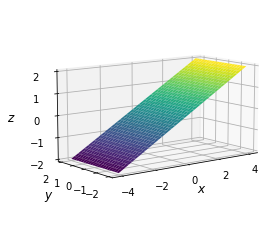

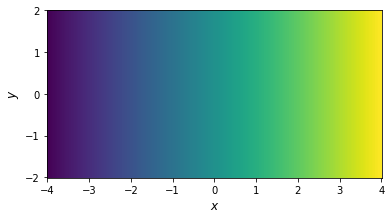

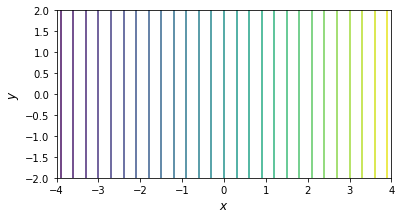

In [241]:
# Parameter :
x_0 = -4; x_E =4; y_0 = -2; y_E =2;
N_x =401; N_y =201; N_g =10; N_l =31; az = -38 -90; el =10; fig =1;
# Funktionen :
def f(x,y): z =0.5* x ; return z;
# Daten :
x_data =np.linspace(x_0 ,x_E ,N_x);
y_data =np.linspace(y_0 ,y_E ,N_y);
[x_grid,y_grid]= np.meshgrid(x_data , y_data );
z_grid = f(x_grid,y_grid);
# Graph - Plot :
fh=pl.figure(fig); ax=pl.axes(projection ='3d');
ax.plot_surface (x_grid,y_grid,z_grid , rstride =N_g , cstride =N_g ,
cmap ='viridis'); ax. view_init (el ,az);
ax.set_xlabel (r'$x$'); ax. set_ylabel (r'$y$'); ax. set_zlabel (r'$z$');
ax.set_box_aspect ((np.ptp(x_grid),np.ptp(y_grid),np.ptp(z_grid)));
# Farb - Plot :
fig=fig +1; fh=pl.figure (fig);
pl.pcolor(x_grid ,y_grid ,z_grid, cmap ='viridis',shading ='auto');
pl.xlabel(r'$x$'); pl.ylabel (r'$y$');
pl.grid (visible=False ); pl.axis ('image');
# Level -Linien - Plot :
fig=fig +1; fh=pl.figure(fig);
pl.contour(x_grid ,y_grid ,z_grid ,N_l);
pl.xlabel(r'$x$'); pl.ylabel (r'$y$');
pl.grid(visible=False); pl.axis('image');

---

## Parametrisierte Kurven/Flächen <a class="anchor" id="ParametrisierteKurvenFlächen"></a> [Back to top](#TableofContents)

### Parametrisierte Kurven

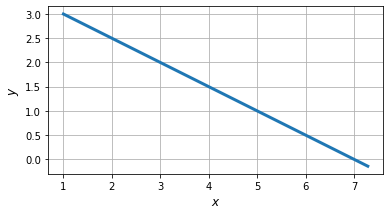

In [294]:
# Parameter :
tau_0 =0; tau_E = np.pi ; N =201; lw =3; fig = fig+1;
# Funktionen :
def s(tau): # Parametrisierung
    x = 1 + 2 * tau;
    y = 3 - tau;
    return x, y;
# Daten :
tau_data = np.linspace(tau_0 ,tau_E, N);
[x_data, y_data]= s (tau_data);
# Plot :
fh = pl.figure(fig);
pl.plot(x_data, y_data, linewidth = lw);
pl.xlabel(r'$x$'); pl.ylabel(r'$y$');
pl.grid('on'); pl.axis('image');

### Parametrisierte Flächen

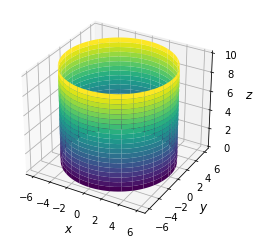

In [295]:
# Parameter :
R =6; H = 10; u_0 = 0; u_E = 2* np.pi; v_0 = 0; v_E = H;
N_u = 101; N_v = 21; fig = fig+1;
# Funktionen :
def P(u, v): # Parametrisierung
    x = R * np.cos(u);
    y = R * np.sin(u);
    z = v;
    return x, y, z;
# Daten :
u_data = np.linspace(u_0, u_E, N_u);
v_data = np.linspace(v_0, v_E, N_v);
[u_grid, v_grid] = np.meshgrid(u_data, v_data);
[x_grid, y_grid, z_grid] = P(u_grid, v_grid);
# Plot :
fh= pl.figure(fig); ax=pl.axes(projection='3d');
ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'viridis');
ax.set_xlabel (r'$x$'); ax.set_ylabel(r'$y$'); ax.set_zlabel(r'$z$');
ax.set_box_aspect((np.ptp(x_grid), np.ptp(y_grid), np.ptp(z_grid)));

---

## Standard-Plots <a class="anchor" id="Standard-Plots"></a> [Back to top](#TableofContents)

### Basic Plot einer Funktion <a class="anchor" id="BasicPloteinerFunktion"></a>

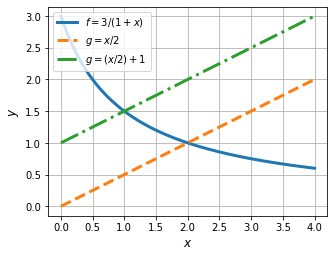

In [20]:
# Python konfigurieren :
pl.close("all");
pl.rcParams["figure.figsize"]=(5, 5);
# Parameter :
x_0 = 0; x_E = 4; N = 201; lw = 3; fig = fig+1;
# Funktionen :
def f(x): y = 3/(1+x); return y;
def g(x): y = x/2; return y;
def h(x): y = (x/2)+1; return y;
# Daten :
x_data = np.linspace(x_0, x_E, N);
f_data = f(x_data);
g_data = g(x_data);
h_data = h(x_data);
# Plot :
fh = pl.figure(fig);
pl.plot(x_data, f_data, linewidth = lw, label = r"$f = 3/(1+x)$"); # $-Zeichen -> Kursiv -> Mathematischer Ausdruck
pl.plot(x_data, g_data, "--", linewidth = lw, label =r"$g = x/2$");
pl.plot(x_data, h_data, "-.", linewidth = lw, label =r"$g = (x/2)+1$");
pl.xlabel(r"$x$ "); pl.ylabel(r"$y$"); pl.legend();
pl.grid("on"); pl.axis("image");

### Plot einer trigonometrischer Funktion (modifizierte x Achse)  <a class="anchor" id="PloteinertrigonometrischenFunktion"></a>

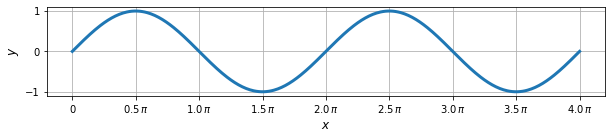

In [10]:
# Python konfigurieren
pl.close("all");
pl.rcParams["figure.figsize"]=(10, 5);
# Parameter :
x_0 = 0; x_E = 4*np.pi; N = 401; N_t = 9; lw = 3; fig = fig +1;
# Funktionen :
def f(x): y = np.sin(x); return y;
# Daten :
x_data = np.linspace(x_0, x_E, N);
f_data = f(x_data);
# Plot :
fh = pl.figure(fig);
pl.plot(x_data, f_data, linewidth = lw);
pl.xlabel(r"$x$"); pl.ylabel(r"$y$");
pl.xticks(np.linspace(x_0, x_E, N_t), ("$0$", "$0.5\,\pi$", "$1.0\,\pi$", "$1.5\,\pi$", "$2.0\,\pi$", "$2.5\,\pi$", "$3.0\,\pi$", "$3.5\,\pi$", "$4.0\,\pi$"));
pl.grid("on"); pl.axis("image");

---

## Heron-Verfahren <a class="anchor" id="Heron-Verfahren"></a> [Back to top](#TableofContents)

> Mit dem Heron-Verfahren wird die Quadratwurzel einer Zahl $q$ von beliebigem Startwert aus "angenähert" und ist somit nach $x$ Iterationen genau berechnet.

### Heron-Verfahren: Visualisierung <a class="anchor" id="Heron-VerfahrenVisualisierung"></a>

C:\Users\leand\AppData\Local\Temp/ipykernel_1676/1648996311.py:17: RuntimeWarning: divide by zero encountered in true_divide
  def f(x): y=0.5*(x + q / x); return y


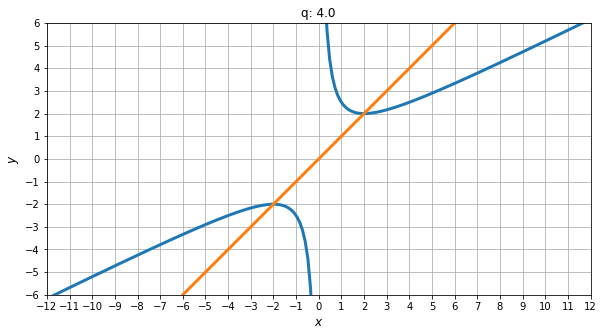

In [11]:
# Python konfigurieren
pl.close("all");
pl.rcParams["figure.figsize"]=(10, 5);
# Parameter :
q=4.        # gesuchte Quadrat-Wurzel
x_0=-12.    # Startwert x-Achse
x_E=-x_0    # Endwert x-Achse
y_a=-6.;    # Startpunkt y-Achse
y_b=-y_a    # Endpunkt y-Achse
N_f=201;    # Anz. Punkte für linspace Liste (Anzahl ausgerechnete Punkte für Plot) -> sollte ungerade sein!
N_g=3;      # Anz. Punkte für linspace Liste für Funktion g
lw=3;       # Liniendicke
fig=fig+1;  # Name/Nummer des Plots
tc_x=np.r_[x_0:x_E+1.:1.]; # x-Ticks für x-Achse
tc_y=np.r_[y_a:y_b+1.:1.]; # y-Ticks für y-Achse
# Funktionen :
def f(x): y=0.5*(x + q / x); return y
# Daten :
x_a_data=np.linspace(x_0, x_E, N_f);
x_b_data=np.linspace(x_0, x_E, N_f);
f_a_data=f(x_a_data);
f_b_data=f(x_b_data);
x_data=np.linspace(x_0, x_E, N_g);
g_data=x_data;
# Plot :
fh=pl.figure(fig);
pl.plot(x_a_data, f_a_data, linewidth=lw);
pl.plot(x_data, g_data, linewidth=lw);
pl.title("q: "+ str(q))
pl.xlabel(r"$x$");pl.ylabel(r"$y$");
pl.xticks(tc_x); pl.yticks(tc_y);
pl.grid("on"); pl.axis("image");
pl.xlim([x_0, x_E]); pl.ylim([y_a, y_b]);

### Heron-Verfahren: Numerisch <a class="anchor" id="Heron-VerfahrenNumerisch"></a> [Back to top](#TableofContents)

In [12]:
def Heron_Verfahren_Num(q):
    # Parameter :
    q = float(q); a_0 = 1.; pr = 16;
    # Funktionen :
    def f(x): y = 0.5*(x + q / x); return y;
    # Iteration :
    w = 0.; a = a_0 ; k = 0;

    print(f"Iterationen für q = {q} :");
    print(f"a_{k} = {a:#.{pr}g}")
    while a != w:
        w = a; 
        k = k+1;
        a = f(a);
        print(f"a_{k} = {a:#.{pr}g}");
    # Ausgabe :
    print("---------------------------------------------------------");
    print(f"Wurzel : sqrt ({q:#.{pr}g}) = {a:#.{pr}g}");
    print("---------------------------------------------------------");

Heron_Verfahren_Num(2) # Verfahren als Funktion aufrufen

Iterationen für q = 2.0 :
a_0 = 1.000000000000000
a_1 = 1.500000000000000
a_2 = 1.416666666666667
a_3 = 1.414215686274510
a_4 = 1.414213562374690
a_5 = 1.414213562373095
a_6 = 1.414213562373095
---------------------------------------------------------
Wurzel : sqrt (2.000000000000000) = 1.414213562373095
---------------------------------------------------------


---

### Rekursive Folgen <a class="anchor" id="RekursiveFolgen"></a> [Back to top](#TableofContents)

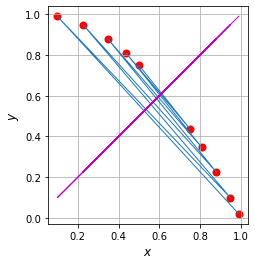

In [321]:
def f(x): y = 1 - x**2; return y; # Rekursive Folge definieren

x_data = [1/2]
y_data = []

n = 10
curx = 0

for i in range(n):
    x = x_data[curx]
    new_y = f(x)
    y_data.append(new_y)
    x_data.append(new_y)
    curx += 1
x_data.pop()

fh=pl.figure();
pl.plot(x_data, y_data, linewidth=1);
pl.plot(x_data, x_data, c="m", linewidth=1);
pl.scatter(x_data, y_data,color="r", linewidth=2);
pl.xlabel(r'$x$'); pl.ylabel(r'$y$');
pl.grid(visible=True); pl.axis('image');
#pl.savefig("rekursiv_plotter.png");

---

## Interpolation <a class="anchor" id="Interpolation"></a> [Back to top](#TableofContents)

### Interpolation gemäss Newton-Schema <a class="anchor" id="InterpolationgemässNewton-Schema"></a>

In [13]:
def Interploation_Newton_Schema(x_data, y_data, N, fig):
    # Python konfigurieren:
    pl.close('all');
    pl.rcParams['figure.figsize']=(5,10);
    # Parameter:
    x_data=x_data;
    y_data=y_data;
    x_0=x_data[0]; x_E=x_data[-1]; N=N; lw=3; fig = fig+1;
    # Berechnungen:
    n=np.size(y_data);
    TAB=np.block([[y_data],[np.zeros((n-1,n))]]);
    c_data=np.zeros(n);
    c_data[0]=y_data[0];
    for i in range(1,n):
        for j in range(i,n):
            TAB[i][j]=(TAB[i-1][j]-TAB[i-1][j-1])/(x_data[j]-x_data[j-i]);
        c_data[i]=TAB[i][i];
    # Ausgabe:
    print(f"Daten Argumente:      x = {x_data}");
    print(f"Daten Funktionswerte: y = {y_data}");
    print(f"Newton-Koeffizienten: c = {c_data}\n");
    # Funktionen:
    def p(x):
        d=1.; y=c_data[0];
        for k in range(1,n):
            d=d*(x-x_data[k-1]);
            y=y+c_data[k]*d;
        return y;
    # Daten:
    u_data=np.linspace(x_0,x_E,N);
    v_data=p(u_data);
    # Plot:
    fh=pl.figure(fig);
    pl.plot(u_data,v_data,linewidth=lw);
    pl.plot(x_data,y_data,'o',linewidth=lw);
    pl.xlabel(r'$x$'); pl.ylabel(r'$y$');
    pl.grid(visible=True); pl.axis('image');

#### Interpolation einer Geraden

Daten Argumente:      x = [4. 8.]
Daten Funktionswerte: y = [ 1. -1.]
Newton-Koeffizienten: c = [ 1.  -0.5]



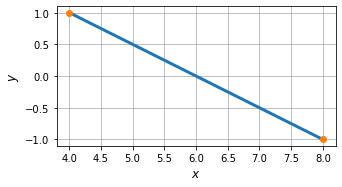

In [14]:
Interploation_Newton_Schema(x_data=np.array([4., 8.]), y_data=np.array([1., -1.]), N=3, fig=fig) # Verfahren als Funktion aufrufen

#### Interpolation eines Polynoms

Daten Argumente:      x = [-1.  0.  1.  2.]
Daten Funktionswerte: y = [-5. -1. -1.  1.]
Newton-Koeffizienten: c = [-5.  4. -2.  1.]



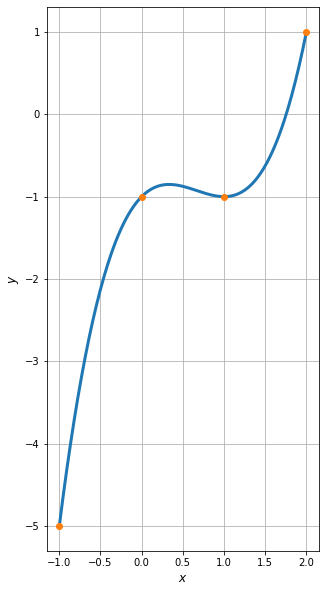

In [15]:
Interploation_Newton_Schema(x_data=np.array([-1., 0., 1., 2.]), y_data=np.array([-5., -1., -1., 1.]), N=201, fig=fig) # Verfahren als Funktion aufrufen

---

### Interpolation anhand von Library <a class="anchor" id="InterpolationanhandvonLibrary"></a> [Back to top](#TableofContents)

In [16]:
def Interpolation_with_Library(x_data, y_data, fig):
    # Python konfigurieren:
    pl.close('all');
    pl.rcParams['figure.figsize']=(15,5);
    # Parameter:
    x_data=x_data; # x-Daten welche modifiziert werden können
    y_data=y_data; # y-Daten welche modifiziert werden können
    x_0=0; x_E=11; y_a=-1.; y_b=5.; N=501; lw=3; sp=0.2; fig=fig+1; # Daten welche modifiziert werden müssen je nach x/y Daten
    tc_x=np.r_[x_0:x_E+1]; # x-Ticks für x-Achse
    tc_y=np.r_[y_a:y_b+0.5:0.5]; # y-Ticks für y-Achse
    # Berechnungen:
    po=ip.BarycentricInterpolator(x_data, y_data);
    cs=ip.CubicSpline(x_data, y_data);
    # Daten:
    u_data=np.linspace(x_0, x_E, N);
    v_data=po(u_data);
    w_data=cs(u_data);
    # Plot:
    [fh,ax]=pl.subplots(1,2); # Subplot initialisieren

    # Subplot 1 - BarycentricInterpolator
    ax[0].title.set_text('BarycentricInterpolator')
    ax[0].plot(u_data,v_data,linewidth=lw);
    ax[0].plot(x_data,y_data,'o',linewidth=lw);
    ax[0].set_xlabel(r'$x$');
    ax[0].set_ylabel(r'$y$');
    ax[0].set_xticks(tc_x);
    ax[0].set_yticks(tc_y);
    ax[0].grid(visible=True);
    ax[0].axis([x_0,x_E,y_a,y_b]);

    # Subplot 2 CubicSpline
    ax[1].title.set_text('CubicSpline')
    ax[1].plot(u_data,w_data,linewidth=lw);
    ax[1].plot(x_data,y_data,'o',linewidth=lw);
    ax[1].set_xlabel(r'$x$');
    ax[1].set_ylabel(r'$y$');
    ax[1].set_xticks(tc_x);
    ax[1].set_yticks(tc_y);
    ax[1].grid(visible=True);
    ax[1].axis([x_0,x_E,y_a,y_b]);
    pl.subplots_adjust(hspace=sp);

#### Interpolation anhand von nicht angepassten y_data Werten

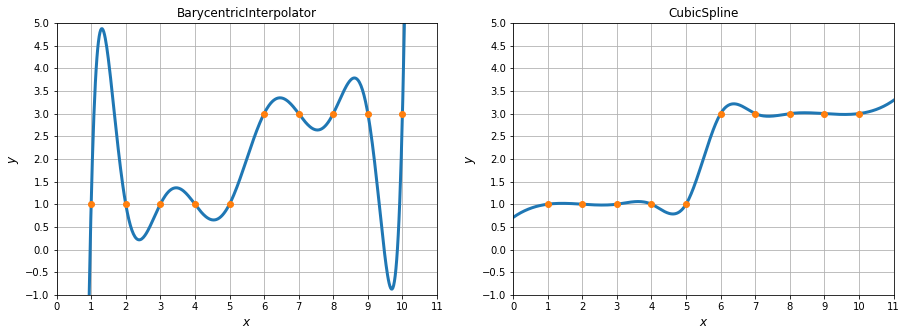

In [17]:
# Noch nicht angepasste y_data Werte (noch kein "natürlicher Verlauf")
Interpolation_with_Library(x_data=np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]), y_data=np.array([1.,1.,1.,1.,1.,3.,3.,3.,3.,3.]), fig=fig) # Verfahren als Funktion aufrufen

#### Interpolation anhand von angepassten y_data Werten

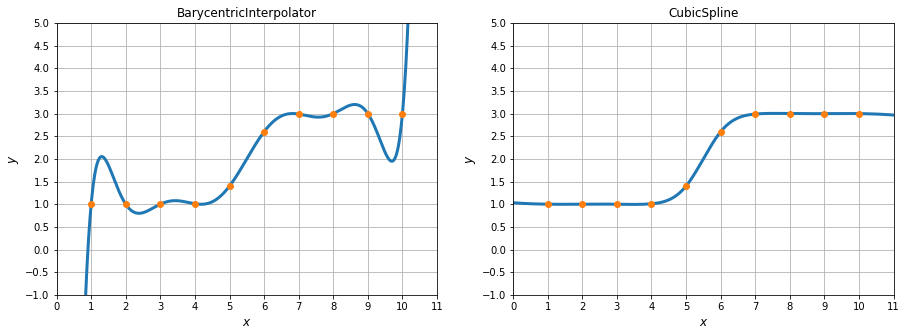

In [18]:
# Angepasste y_data Werte ("natürlicher Verlauf")
Interpolation_with_Library(x_data=np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]), y_data=np.array([1.,1.,1.,1.01,1.4,2.6,2.99,3.,3.,3.]), fig=fig) # Verfahren als Funktion aufrufen

---

## Regression <a class="anchor" id="Regression"></a> [Back to top](#TableofContents)

### Regression für Gerade (Polynom  mit degree = 1) <a class="anchor" id="RegressionfürGerade"></a>

f(x) = m*x + q
m: -0.628571428571429 | q: 3.385714285714289


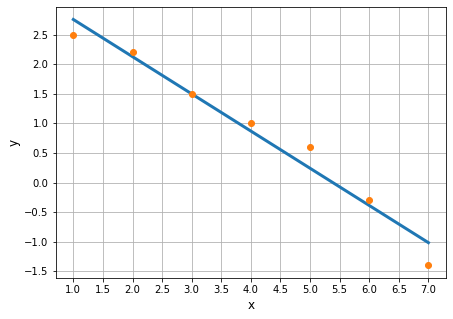

In [19]:
# Python konfigurieren:
pl.close('all');
pl.rcParams['figure.figsize']=(7,7);
# Python initialisieren:
import matplotlib.pyplot as pl;
import numpy as np;
# Parameter:
dg=1; # dg gibt den Grad des Polynoms an -> dg = 1 -> Gerade
x_0=1.; x_E=7.; y_a=-2.; y_b=3.; # Daten welche modifiziert werden müssen je nach x/y Daten
N=201; lw=3; fig=fig+1;
# Daten:
x_data=np.array([1.,2.,3.,4.,5.,6.,7.]); # x-Daten welche modifiziert werden können
y_data=np.array([2.5, 2.2 ,1.5 ,1.0 ,0.6 ,-0.3, -1.4]); # y-Daten welche modifiziert werden können
tc_x=np.r_[x_0:x_E+0.5:0.5]; # x-Ticks für x-Achse
tc_y=np.r_[y_a:y_b+0.5:0.5]; # y-Ticks für y-Achse
# Berechnungen:
u_data=np.linspace(x_0,x_E,N);
p=np.polyfit(x_data,y_data,dg);
g_data=np.polyval(p,u_data);
# Ausgabe:
print("f(x) = m*x + q")
print("m:", p[0], "| q:", p[1])
# Plot:
fh=pl.figure(fig);
pl.plot(u_data,g_data,linewidth=lw);
pl.plot(x_data,y_data,'o',linewidth=lw);
pl.xlabel('x'); pl.ylabel('y');
pl.xticks(tc_x); pl.yticks(tc_y);
pl.grid(visible=True); pl.axis('image');

### Exponentielle Regression <a class="anchor" id="ExponentielleRegression"></a>

[-1.27004387e-04  6.92982690e+00]
p(x=4049) = 611.2989597798659


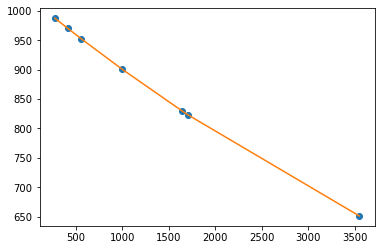

In [315]:
x = np.array([273, 412, 556,990,1638,1709,3550]); # x-Messwerte
y = np.array([976.9,973.6,955.5,902.3,834.2,824.7,649.]); # y-Messwerte
log_y_data = np.log(y);
curve_fit = np.polyfit(x, log_y_data, 1);
print(curve_fit);
y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x);
pl.plot(x, y, "o");
pl.plot(x, y);
def p(x):
    y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x);
    return y;
print("p(x=4049) =", p(4049));

---

## Extrapolation <a class="anchor" id="Extrapolation"></a> [Back to top](#TableofContents)

### Extrapolation gemäss Neville-Aitken-Schema <a class="anchor" id="ExtrapolationgemässNeville-Aitken-Schema"></a>

#### Standard-Verfahren

In [20]:
# Funktionen :
def NeAi (x, x_data, y_data):
    n = np.size(y_data);
    print("x_data:", x_data, "| y_data:", y_data)
    print("np.size(y_data):", n)
    TAB = np.block([[y_data],[np.zeros((n-1,n ))]]);
    for i in range(1, n ):
        for j in range(i, n):
            TAB[i][j]=((x - x_data [j - i])*TAB[i-1][j]-(x - x_data [j])* TAB[i-1][j-1])/(x_data[j]-x_data[j-i]);
    return TAB[n-1][n-1];

# Parameter :
pr = 16; # Nachkommastellen
x = 3.; # Stelle welche vorhergesagt bzw. extrapoliert werden soll
# Daten :
x_data = np.array([-1., 0., 1., 2.]); # x-Daten welche modifiziert werden können
y_data = np.array([-5., -1., -1., 1.]); # y-Daten welche modifiziert werden können
# Berechnungen :
print ('------------------------------------------------------');
y = NeAi(x, x_data, y_data); # Verfahren als Funktion aufrufen und in Variable y speichern
# Ausgabe :
print (f"p({x:#.{pr}g}) = {y:#.{pr}g}");
print ('------------------------------------------------------');

------------------------------------------------------
x_data: [-1.  0.  1.  2.] | y_data: [-5. -1. -1.  1.]
np.size(y_data): 4
p(3.000000000000000) = 11.00000000000000
------------------------------------------------------


#### Verfahren für Stelle 0

> Beispiel: Noch bessere Näherung für **Integral** &rarr; $I = \int_{0}^{\pi} \sin(x) \; dx$ durch Schrittweiten-Extrapolation gemäss Neville-Aitken-Schema

In [21]:
# Funktionen :
def NeAiNu(x_data, y_data):
    n = np.size(y_data);
    print("x_data:", x_data, "| y_data:", y_data)
    print("np.size(y_data):", n)
    TAB = np.block([[y_data],[np.zeros((n -1, n))]]);
    for i in range(1, n):
        for j in range(i, n):
            TAB[i][j]=(x_data[j]*TAB[i-1][j-1]-x_data[j-i]*TAB[i-1][j])/(x_data[j]-x_data[j-i]);
            #print(TAB,"| i:", i,"| j:", j)
    return TAB[n-1][n-1];

# Parameter :
pr = 16; # Nachkommastellen
# Daten :
x_data = np.array([3.110487775831478e-2 ,1.555243887915739e-2,
7.776219439578696e-3 ,3.888109719789348e-3]); # x-Daten welche modifiziert werden können
y_data = np.array([1.999835503887443 ,1.999959284652254 ,
1.999989871646689 ,1.999997474185016]); # y-Daten welche modifiziert werden können
# Berechnungen :
print ('------------------------------------------------------');
I = NeAiNu(x_data, y_data); # Verfahren als Funktion aufrufen und in Variable I speichern (I für Integral, da ein Integral angenähert wird)
# Ausgabe :
print (f"I = {I:#.{pr}g}");
print ('------------------------------------------------------');

------------------------------------------------------
x_data: [0.03110488 0.01555244 0.00777622 0.00388811] | y_data: [1.9998355  1.99995928 1.99998987 1.99999747]
np.size(y_data): 4
I = 2.000000000803360
------------------------------------------------------


---

## Numerische Integration <a class="anchor" id="NumerischeIntegration"></a> [Back to top](#TableofContents)

### Trapez-Regel <a class="anchor" id="Trapez-Regel"></a>

#### Trapez-Regel mit Schleife

In [22]:
# Parameter :
pr = 16
# Daten :
x_data = [1, 2, 3, 4, 5] # x-Daten welche modifiziert werden können
y_data = [1, 2, 3, 4, 5] # y-Daten welche modifiziert werden können
# Funktionen :
def TRAPZ(y_data, x_data):
    N = np.size(y_data);
    I = 0.;
    for k in range(0, N-1):
        I = I + (x_data[k+1] - x_data[k])*(y_data[k+1] + y_data[k]);
    I = 0.5 * I ;
    return I;

I = TRAPZ(y_data, x_data)
print (f"I = {I:#.{pr}g}");

I = 12.00000000000000


#### Trapez-Regel mit Vektorgeometrie

In [23]:
# Parameter :
x_0 = 0; x_E = 2; n = 10; N = 201; pr=16;
# Funktionen :
def f(x):y = np.sqrt(x + np.sin(x)); return y; # Funktion welche modifiziert werden kann für gewünschte x/y Daten
# Daten :
x_data = np.linspace(x_0, x_E, N); # x-Daten welche modifiziert werden können
y_data = f(x_data); # y-Daten welche modifiziert werden können
# Funktionen :
def TRAPZ_Vektor(y_data, x_data):
    I = 0.5 * np.dot(np.diff(x_data), (y_data[1:] + y_data[0:-1])); # np.dot() -> Skalarprodukt
    return I;

I = TRAPZ_Vektor(y_data, x_data)
print (f"I = {I:#.{pr}g}");

I = 2.490070783046884


#### Trapez-Regel mit Numpy-Befehl

In [24]:
# Parameter :
x_0 = 0; x_E = 2; n = 10; N = 201; pr=16;
# Funktionen :
def f(x):y = np.sqrt(x + np.sin(x)); return y; # Funktion welche modifiziert werden kann für gewünschte x/y Daten
# Berechnungen :
print ('--------------------------------------------------');
for k in range(0, n):
    x_data = np.linspace(x_0, x_E, N); # x-Daten welche modifiziert werden können
    f_data = f(x_data); # y-Daten welche modifiziert werden können
    # Integration :
    I = np.trapz(f_data, x_data);
    print (f"I = {I:#.16g} | N = {N:g} | n = {k:g}");
    N = 2 * N ;
# Ausgabe :
print ('--------------------------------------------------');
print (f"I = {I:#.{pr}g}");
print ('--------------------------------------------------');

--------------------------------------------------
I = 2.490070783046884 | N = 201 | n = 0
I = 2.490260152603558 | N = 402 | n = 1
I = 2.490326897146905 | N = 804 | n = 2
I = 2.490350466364332 | N = 1608 | n = 3
I = 2.490358796310514 | N = 3216 | n = 4
I = 2.490361741357393 | N = 6432 | n = 5
I = 2.490362782708113 | N = 12864 | n = 6
I = 2.490363150933650 | N = 25728 | n = 7
I = 2.490363281138151 | N = 51456 | n = 8
I = 2.490363327177379 | N = 102912 | n = 9
--------------------------------------------------
I = 2.490363327177379
--------------------------------------------------


### Trapez-Regel und Extrapolation <a class="anchor" id="Trapez-RegelundExtrapolation"></a> [Back to top](#TableofContents)

> Wir verbessern bei gleicher Genauigkeit die Effizienz der numerischen Integrationen aus vorherigem Abschnitt durch Schrittweiten-Extrapolation mit Python/Numpy.

In [25]:
# Parameter :
x_0 = 0; x_E = 2; n = 5; N = 201; pr = 16;
# Funktionen :
def f(x): y = np.sqrt(x + np.sin(x)); return y; # Funktion welche modifiziert werden kann für gewünschte x/y Daten

def NeAiNu(x_data, y_data):
    n = np.size(y_data);
    TAB = np.block([[y_data], [np.zeros((n-1, n))]]);
    for i in range (1, n):
        for j in range (i, n):
            TAB[i][j]=(x_data[j]*TAB[i-1][j-1] - x_data[j-i]*TAB[i-1][j])/(x_data[j] - x_data[j - i]);
    return TAB[n -1][n-1];
# Berechnungen :
print ('--------------------------------------------------');
h_data = np.zeros(n);
I_data = np.zeros(n);
for k in range(0, n):
    h =(x_E-x_0)/N ;
    x_data = np.linspace(x_0, x_E, N); # x-Daten welche modifiziert werden können
    f_data = f(x_data); # y-Daten welche modifiziert werden können
    # Integration :
    I = np.trapz(f_data, x_data);
    h_data[k] = h;
    I_data[k] = I;
    print(f"I = {I:#.16g} | N = {N:g}");
    N = 2* N ;
I_raw = I_data[-1];
I_ext = NeAiNu(h_data, I_data);
# Ausgabe :
print ('--------------------------------------------------');
print ( f" I_raw = {I_raw:#.{pr}g}");
print ( f" I_ext = {I_ext:#.{pr}g}");
print ('--------------------------------------------------');

--------------------------------------------------
I = 2.490070783046884 | N = 201
I = 2.490260152603558 | N = 402
I = 2.490326897146905 | N = 804
I = 2.490350466364332 | N = 1608
I = 2.490358796310514 | N = 3216
--------------------------------------------------
 I_raw = 2.490358796310514
 I_ext = 2.490364308312004
--------------------------------------------------


### Simpson-Regel <a class="anchor" id="Simpson-Regel"></a> [Back to top](#TableofContents)

In [26]:
# Parameter :
x_0 = 0; x_E = 2; n = 5; N = 201; pr = 16;
# Funktionen :
def f(x): y = np.sqrt(x + np.sin(x)); return y; # Funktion welche modifiziert werden kann für gewünschte x/y Daten
# Berechnungen :
print('--------------------------------------------------');
for k in range(0, n):
    x_data = np.linspace(x_0, x_E, N); # x-Daten welche modifiziert werden können
    f_data = f(x_data); # y-Daten welche modifiziert werden können
    # Integration :
    I = ig.simps(f_data, x_data);
    print(f"I = {I:#.16g} | N = {N:g}");
    N = 2* N ;
# Ausgabe :
print ('--------------------------------------------------');
print (f"I = {I:#.{pr}g}");
print ('--------------------------------------------------');

--------------------------------------------------
I = 2.490248540102071 | N = 201
I = 2.490301307207030 | N = 402
I = 2.490341457397927 | N = 804
I = 2.490355618589249 | N = 1608
I = 2.490360619340030 | N = 3216
--------------------------------------------------
I = 2.490360619340030
--------------------------------------------------


---

## Lineare Gleichungssysteme <a class="anchor" id="LineareGleichungssysteme"></a> [Back to top](#TableofContents)

### Gauss-Verfahren <a class="anchor" id="Gauss-Verfahren"></a> [Back to top](#TableofContents)

#### Ohne Spalten-Pivotisierung

In [4]:
# Parameter :
A = np.array([[2, 3, 1], [1, -2, -1], [4, 1, -3]]);
b = np.array([8, -3, 6]);
pr = 16;
# Funktionen :
def LGLS_Gauss(A, b):
    # Vorbereitungen :
    G = 1.0*np.block([A, np.expand_dims(b, axis=1)]);
    n = A.shape[0]; # Anzahl Zeilen
    # Stufenform 
    for ps in range(0, n-1):
        p = G[ps][ps];
        for zz in range(ps+1, n):
            f = G[zz][ps] / p;
            G[zz][ps]= 0.;
            for ss in range(ps+1, n+1):
                G[zz][ss] = G[zz][ss] - f * G[ps][ss];
    # Rueckwaertseinsetzen :
    x = np.zeros(n); w = 0.;
    for rr in range(n-1, -1, -1):
        for ss in range(n-1, rr, -1):
            w = x[ss] * G[rr][ss];
        x[rr]=(G[rr][-1] - w) / G[rr][rr];
    return x;
# Berechnungen :
x = LGLS_Gauss(A, b);
# Ausgabe :
print (f"x = {x}");
#print (f"x = {np.array2string(x, precision=pr)}");

x = [ 1.  2. -0.]


#### Mit Spalten-Pivotisierung

In [6]:
# Parameter :
A = np.array([[2, 3, 1], [1, -2, -1], [4, 1, -3]]);
b = np.array([8, -3, 6]);
pr = 16;
# Funktionen :
def LGLS_Gauss(A, b):
    # Vorbereitungen :
    G = 1.0*np.block([A, np.expand_dims(b, axis=1)]);
    n = A.shape[0]; # Anzahl Zeilen
    # Stufenform 
    for ps in range(0, n-1):
        mm = ps + np.argmax(np.abs(G[range(ps, n), ps]));
        if mm != ps:
            tmp = np.copy(G[ps]);
            G[ps] = G[mm];
            G[mm] = tmp ;
        p = G[ps][ps];
        for zz in range(ps+1, n):
            f = G[zz][ps] / p;
            G[zz][ps]= 0.;
            for ss in range(ps+1, n+1):
                G[zz][ss] = G[zz][ss] - f * G[ps][ss];
    # Rueckwaertseinsetzen :
    x = np.zeros(n); w = 0.;
    for rr in range(n-1, -1, -1):
        for ss in range(n-1, rr, -1):
            w = x[ss] * G[rr][ss];
        x[rr]=(G[rr][-1] - w) / G[rr][rr];
    return x;
# Berechnungen :
x = LGLS_Gauss(A, b);
# Ausgabe :
print (f"x = {x}");
#print (f"x = {np.array2string(x, precision=pr)}");

x = [1. 2. 0.]


### Gauss-Jordan-Verfahren <a class="anchor" id="Gauss-Jordan-Verfahren"></a> [Back to top](#TableofContents)

In [10]:
# Parameter :
G = np.array([[2, 1, 0, 2, 6], [4, 2 ,3 ,3 ,16], [-2, -1, 6, -4, 2], [-8, -4, 9, -11, -12], [2, 1, -3, 3, 2]]);
pr = 3;
# Funktionen :
def LGLS_rref(G, tol = -1):
    # Berechnungen :
    n_Z = G.shape[0];
    n_S = G.shape[1];
    if tol < 0:
        tol = np.max(G.shape) * np.linalg.norm(G,ord = np.inf) * np.finfo(np.float64).eps;
    # Stufenform berechnen :
    pz = np.int_([]); ps = np.int_([]);
    ez = 0; n_R = 0; m_Z = n_Z-1;
    H = np.copy(1.0*G);
    for es in range (0, n_S):
        # Spalten -Pivot - Suche :
        if ez < m_Z:
            mm = ez + np.argmax(np.abs(H[range(ez, n_Z), es]));
        else :
            mm = m_Z;
        if np.abs(H[mm][es]) > tol:
            if mm != ez :
                tmp = np.copy(H[ez]);
                H[ez]= H[mm];
                H[mm] = tmp;
            # Division durch Pivot - Wert :
            p = H[ez][es];
            H[ez][es] = 1.0;
            for jj in range(es+1, n_S):
                H[ez][jj] = H[ez][jj] / p;
            # Elimination vorwaerts :
            for ii in range(ez+1, n_Z):
                q = H[ii][es];
                H[ii][es]=0.0;
                for jj in range(es+1, n_S):
                    H[ii][jj] = H[ii][jj] - q * H[ez][jj];
            n_R = n_R+1;
            pz = np.append(pz, ez);
            ps = np.append(ps, es);
            if ez == m_Z :
                break;
            ez = ez+1;
        else:
            for ii in range(ez, n_Z):
                H[ii][es] = 0.0;
    # Stufenform reduzieren :
    for kk in range(n_R-1, -1, -1):
        ez = pz[kk]; es = ps[kk];
        # Elimination rueckwaerts :
        for ii in range(ez-1, -1, -1):
            q = H[ii][es];
            H[ii][es]=0.0;
            for jj in range(es+1, n_S):
                H[ii][jj] = H[ii][jj] - q * H[ez][jj];
    return H;
# Berechnungen :
H = LGLS_rref(G);
# Ausgabe :
print (f"H = \n{H}");
#print(f"H = \n{np.array2string(H, precision = pr)}");

H = 
[[ 1.          0.5         0.          1.          3.        ]
 [ 0.          0.          1.         -0.33333333  1.33333333]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


### LR-Zerlegungen von Matrizen <a class="anchor" id="LR-ZerlegungenvonMatrizen"></a> [Back to top](#TableofContents)

#### 3-D

In [18]:
A = np.array([[2,3,1],[1,2,-1],[3,5,1]]); # Matrix welche gelöst werden soll
pr=3;
# Berechnungen :
[P, L, R]= cp.linalg.lu(A);
# Ausgabe :
with np.printoptions(precision = pr):
    print (f"P = \n{P}\n\nL = \n{L}\n\nR = \n{R}");

P = 
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

L = 
[[ 1.     0.     0.   ]
 [ 0.333  1.     0.   ]
 [ 0.667 -1.     1.   ]]

R = 
[[ 3.     5.     1.   ]
 [ 0.     0.333 -1.333]
 [ 0.     0.    -1.   ]]


### QR-Zerlegungen von Matrizen <a class="anchor" id="QR-ZerlegungenvonMatrizen"></a> [Back to top](#TableofContents)

#### 2-D

In [19]:
# Parameter :
A = np.array([[3,1],[6,9]]); pr=3;
# Berechnungen :
[Q, R] = cp.linalg.qr(A);
#[Q, R] = np.linalg.qr(A); # numpy
# Ausgabe :
with np.printoptions(precision=pr):
    print(f"A = \n{A}\n");
    print(f"Q = \n{Q}\n\nR = \n{R}");

A = 
[[3 1]
 [6 9]]

Q = 
[[-0.447 -0.894]
 [-0.894  0.447]]

R = 
[[-6.708 -8.497]
 [ 0.     3.13 ]]


#### 3-D

In [20]:
# Parameter :
A = np.array([[2,1,-10],[-1,4,5],[2,10,8]]); pr=3;
# Berechnungen :
[Q, R] = cp.linalg.qr(A); # scipy
#[Q, R] = np.linalg.qr(A); # numpy
# Ausgabe :
with np.printoptions(precision=pr):
    print(f"A = \n{A}\n");
    print(f"Q = \n{Q}\n\nR = \n{R}");

A = 
[[  2   1 -10]
 [ -1   4   5]
 [  2  10   8]]

Q = 
[[-0.667  0.333 -0.667]
 [ 0.333 -0.667 -0.667]
 [-0.667 -0.667  0.333]]

R = 
[[ -3.  -6.   3.]
 [  0.  -9. -12.]
 [  0.   0.   6.]]


### Hilbert-LGLS <a class="anchor" id="Hilbert-LGLS"></a> [Back to top](#TableofContents)

#### Matrix generieren

In [10]:
# Parameter:
n=5; pr_a=4; pr_b=3;
# Funktionen:
def LGLS_Hilbert(n):
    k_data=np.r_[1:n+1];
    [i_grid,j_grid]=np.meshgrid(k_data,k_data);
    A=1./(i_grid+j_grid-1);
    b=np.sum(A,axis=1);
    return A,b;

LGLS_Hilbert(n)

(array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
        [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
        [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
        [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
        [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]]),
 array([2.28333333, 1.45      , 1.09285714, 0.88452381, 0.74563492]))

#### Hilbert-LGLS lösen

In [11]:
[A,b]=LGLS_Hilbert(n);
G=np.block([A,np.expand_dims(b,axis=1)]);
x=np.linalg.solve(A,b);
C=np.linalg.cond(A);
D=np.linalg.det(A);
# Ausgabe:
with np.printoptions(precision=pr_a):
    print(f"G = \n{G}\n");
    print(f"x = \n{x}\n");
print(f"C = {C:#.{pr_b}g}\n");
print(f"D = {D:#.{pr_b}g}\n");

G = 
[[1.     0.5    0.3333 0.25   0.2    2.2833]
 [0.5    0.3333 0.25   0.2    0.1667 1.45  ]
 [0.3333 0.25   0.2    0.1667 0.1429 1.0929]
 [0.25   0.2    0.1667 0.1429 0.125  0.8845]
 [0.2    0.1667 0.1429 0.125  0.1111 0.7456]]

x = 
[1. 1. 1. 1. 1.]

C = 4.77e+05

D = 3.75e-12



### LGLS iterativ lösen <a class="anchor" id="LGLSiterativlösen"></a> [Back to top](#TableofContents)

#### Jacobi-Verfahren

In [37]:
# Parameter :
A = np.array([[3.,1.,1.],[1.,3.,1.],[1.,1.,3.]]);
b = np.array([8.,10.,12.]);
N = 100; pr_x = 3; pr_y = 2; pr_t = 16; n = np.shape(b)[0]; # Anzahl Zeilen
# Vorbereitungen :
H = np.diag (1/np.diag(A));
M = np.eye(n)-H@A;
y = np.linalg.norm(M);
q = H@b; x = b; w = 0.; k = 0;
# Funktionen :
def f(x): y = M@x + q; return y;
# Berechnungen :
print('Iteration :');
print(f"x_{k} =  {x}")
while np.array_equal(x, w) == False and k < N:
    w = x;
    k += 1;
    x = f(x);
print(f"x_{k} = {np.array2string(x, precision = pr_t)}"); # Nur letze Iteration ausgeben (ansonsten -> print-Statement in While-Schlaufe einfügen)
# Ausgabe :
print("-------------------------------------------------------------------")
print(f"Loesung : x = {np. array2string(x, precision = pr_x )}");
print(f"Norm :    y = {y :#.{pr_y}g}");

Iteration :
x_0 =  [ 8. 10. 12.]
x_96 = [1.                 1.9999999999999998 3.                ]
-------------------------------------------------------------------
Loesung : x = [1. 2. 3.]
Norm :    y = 0.82


#### Richardson-Verfahren

In [38]:
# Parameter :
A = np.array([[3.,1.,1.],[1.,3.,1.],[1.,1.,3.]]);
b = np.array([8.,10.,12.]);
s = 0.25; N = 100; pr_x = 3; pr_y = 2; pr_t = 16; n = np.shape(b)[0];
# Vorbereitungen :
H = s*np.eye(n);
M = np.eye(n) - H@A;
y = np.linalg.norm(M);
q = H@b; x = b; w = 0.; k = 0;
# Funktionen :
def f(x): y = M@x + q; return y;
# Berechnungen :
print('Iteration :');
print(f"x_{k} =  {x}")
while np.array_equal(x, w) == False and k < N:
    w = x;
    k += 1;
    x = f(x);
print(f"x_{k} = {np.array2string(x, precision = pr_t)}"); # Nur letze Iteration ausgeben (ansonsten -> print-Statement in While-Schlaufe einfügen)
# Ausgabe :
print("-------------------------------------------------------------------")
print(f"Loesung : x = {np. array2string(x, precision = pr_x )}");
print(f"Norm :    y = {y :#.{pr_y}g}");

Iteration :
x_0 =  [ 8. 10. 12.]
x_54 = [1. 2. 3.]
-------------------------------------------------------------------
Loesung : x = [1. 2. 3.]
Norm :    y = 0.75


---

^ [Back to top](#TableofContents) ^

Ende des Cheatsheets 🙃